In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
for fn in uploaded.keys():
  print('user uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

user uploaded file "archive.zip" with length 68268497 bytes


In [4]:
from zipfile import ZipFile
file_name = "archive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [5]:
!pip install tensorflow keras --upgrad
!pip3 install tensorflow keras --upgrad


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


In [6]:
import numpy as np
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_dir = '/content/data/train'
val_dir = '/content/data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [8]:
# Instead of importing TensorFlowOpLayer from keras.engine.base_layer
# which may not be available in newer Keras versions, you can
# directly use tf.keras.layers.Layer, which is the base class
# for all layers in TensorFlow Keras.

# Remove this line:
#from keras.engine.base_layer import TensorFlowOpLayer

# The rest of the code for defining and using the model should work as is.
import tensorflow as tf

emotion_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu,input_shape=(48,48,1)),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(7, activation=tf.nn.softmax)
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Instead of using fit_generator:
# emotion_model_info = emotion_model.fit_generator(
#         train_generator,
#         steps_per_epoch=28709 // 64,
#         epochs=80,
#         validation_data=validation_generator,
#         validation_steps=7178 // 64)

# Use fit with the same parameters:
emotion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # Add this line to compile the model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=80, # can also try for 50 epochs
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/80


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 208s 450ms/step - accuracy: 0.2826 - loss: 1.7697 - val_accuracy: 0.4048 - val_loss: 1.5985
Epoch 2/80


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4531 - loss: 1.5320 - val_accuracy: 0.4068 - val_loss: 1.5930
Epoch 3/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 215s 481ms/step - accuracy: 0.4152 - loss: 1.5093 - val_accuracy: 0.4480 - val_loss: 1.4458
Epoch 4/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.4062 - loss: 1.6227 - val_accuracy: 0.4519 - val_loss: 1.4431
Epoch 5/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 246s 458ms/step - accuracy: 0.4724 - loss: 1.3720 - val_accuracy: 0.4879 - val_loss: 1.3724
Epoch 6/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5938 - loss: 1.1497 - val_accuracy: 0.4840 - val_loss: 1.3713
Epoch 7/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 258s 463ms/step - accuracy: 0.5031 - loss: 1.3037 - val_accuracy: 0.5007 - val_loss: 1.3140
Epoch 8/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5312 - loss: 1.2065 - val_accuracy: 0.5001 - val_loss: 1.3151
Epoch 9/80
448/448 ━━━━━━━━━━━━━━━━━━━━ 253s 457ms/step - accuracy: 0.5233 - loss: 1.2505 - val_acc

In [11]:
emotion_model.save('model.h5')

In [12]:
from keras.models import load_model
import tensorflow as tf

# Define a custom object to handle 'softmax_v2'
custom_objects = {'softmax_v2': tf.nn.softmax}

emotion_model = load_model('model.h5', custom_objects=custom_objects)

In [13]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [14]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [17]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

In [18]:
!pip install tensorflow keras --upgrad
!pip3 install tensorflow keras --upgrad


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --upgrad (--upgrade, --upgrade-strategy?)


OpenCV(4.11.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


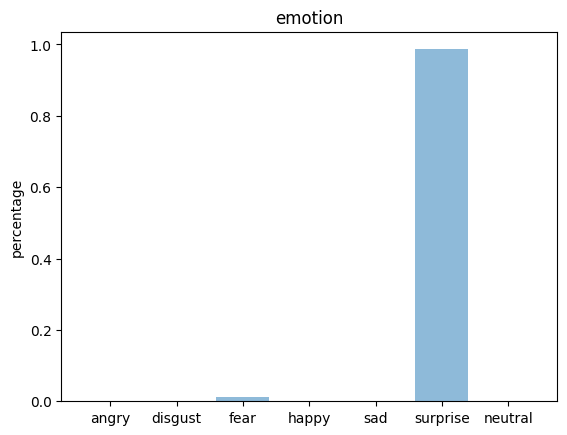

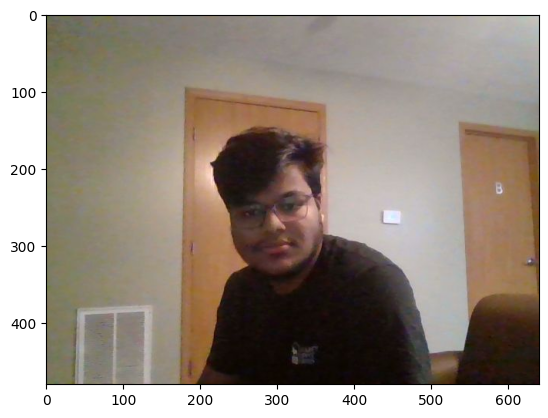

In [19]:
import cv2

def facecrop(image):
    facedata = '/content/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:

        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]


            cv2.imwrite('photo.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)




#if name == 'main':
facecrop('/content/photo.jpg')

#Testing a file.

import keras.utils as image
#from keras.preprocessing.image import ImageDataGenerator # This line was causing the error
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras instead

#from tensorflow.keras.utils import load_img

import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf


file = '/content/photo.jpg'
true_image = image.load_img(file)
img = image.load_img(file, color_mode="grayscale", target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = emotion_model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);


plt.imshow(true_image)
plt.show()